In [1]:
#Importing all the necessary libraries
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go

## Data Loading and Cleaning

In [2]:
#  Detecting encoding function
def detect_encoding(file_path):
    """Detects the file encoding for the given file"""
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# Function to load data using the detected encoding
def load_data(file_path):
    """
    Load CSV data with the detected encoding.
    Uses Windows-1252 or other encoding if needed.
    """
    encoding = detect_encoding(file_path)
    print(f"Detected encoding for {file_path}: {encoding}")
    
    # Using the detected encoding to load the file
    try:
        df = pd.read_csv(file_path, encoding=encoding)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None
    
    return df

In [3]:
#  Cleaning the Year column and handling missing values
def clean_data(df, indicator_name):
    """
    Clean data by handling the 'Year' column and filling missing values.
    """
    print(f"Cleaning data for {indicator_name}")
    
    # Printing the columns to debug column names
    print(f"Columns in dataset: {df.columns}")
    
    # Droping rows where 'Year' is NaN
    df = df.dropna(subset=['Year'])
    
    #Cleaning the column names
    df.columns = df.columns.str.strip() 
    
    # Convert the 'Year' column to string and filter for numeric values
    df['Year'] = df['Year'].astype(str)
    df = df[df['Year'].str.isnumeric()]
    
    # Convert 'Year' to datetime
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    
    # Checking if the indicator exists in the DataFrame
    if indicator_name in df.columns:
        # Filling missing values with forward fill method
        df[indicator_name].fillna(method='ffill', inplace=True)
    else:
        print(f"Column '{indicator_name}' not found. Available columns: {df.columns}")
    
    return df

In [4]:
#  Function to process all datasets
def process_all_datasets():
    """
    Load and clean all datasets using the correct encoding.
    Returns a dictionary of cleaned dataframes.
    """
    datasets = {}
    
    # List of files and their corresponding indicator names
    files = {
        'rwanda_electricity_access.csv': 'Access to electricity',
        'rwanda_renewable_energy_consumption.csv': 'Renewable energy consumption',
        'rwanda_co2_emissions.csv': 'CO2 emissions',
        'rwanda_renewable_electricity_output.csv': 'Renewable electricity output',
        'rwanda_energy_intensity.csv': 'Energy intensity level of primary energy'
    }
    
    for file_name, indicator in files.items():
        print(f"\nLoading {file_name}...")
        df = load_data(file_name)
        if df is not None:
            df = clean_data(df, indicator)
            datasets[indicator] = df
            print(f"{file_name} loaded and cleaned successfully!")
        else:
            print(f"Failed to load {file_name}.")
    
    return datasets

# Loading and cleaning all datasets
datasets = process_all_datasets()


Loading rwanda_electricity_access.csv...
Detected encoding for rwanda_electricity_access.csv: ascii
Cleaning data for Access to electricity
Columns in dataset: Index(['Year', 'Access to electricity '], dtype='object')
rwanda_electricity_access.csv loaded and cleaned successfully!

Loading rwanda_renewable_energy_consumption.csv...
Detected encoding for rwanda_renewable_energy_consumption.csv: ascii
Cleaning data for Renewable energy consumption
Columns in dataset: Index(['Year', 'Renewable energy consumption'], dtype='object')
rwanda_renewable_energy_consumption.csv loaded and cleaned successfully!

Loading rwanda_co2_emissions.csv...
Detected encoding for rwanda_co2_emissions.csv: ascii
Cleaning data for CO2 emissions
Columns in dataset: Index(['Year', 'CO2 emissions'], dtype='object')
rwanda_co2_emissions.csv loaded and cleaned successfully!

Loading rwanda_renewable_electricity_output.csv...
Detected encoding for rwanda_renewable_electricity_output.csv: ascii
Cleaning data for Rene

In [5]:
#Displaying the first few rows of each dataset to verify
for indicator, df in datasets.items():
    print(f"\n{indicator} Data:")
    print(df.head())


Access to electricity Data:
        Year  Access to electricity
0 1990-01-01                    NaN
1 1991-01-01                    NaN
2 1992-01-01                    2.3
3 1993-01-01                    2.3
4 1994-01-01                    2.3

Renewable energy consumption Data:
        Year  Renewable energy consumption
0 1990-01-01                          80.1
1 1991-01-01                          81.8
2 1992-01-01                          81.6
3 1993-01-01                          81.3
4 1994-01-01                          78.5

CO2 emissions Data:
        Year  CO2 emissions
0 1990-01-01       0.073274
1 1991-01-01       0.064316
2 1992-01-01       0.063150
3 1993-01-01       0.061488
4 1994-01-01       0.068580

Renewable electricity output Data:
        Year  Renewable electricity output
0 1990-01-01                     97.660819
1 1991-01-01                     97.633136
2 1992-01-01                     97.727273
3 1993-01-01                     97.484277
4 1994-01-01         

## Exploratory Data Analysis (EDA)


Exploring Access to electricity Data:
        Year  Access to electricity
0 1990-01-01                    NaN
1 1991-01-01                    NaN
2 1992-01-01                    2.3
3 1993-01-01                    2.3
4 1994-01-01                    2.3
       Access to electricity
count              29.000000
mean               13.473019
std                13.293301
min                 1.027836
25%                 3.315577
50%                 8.700000
75%                17.500000
max                46.600000


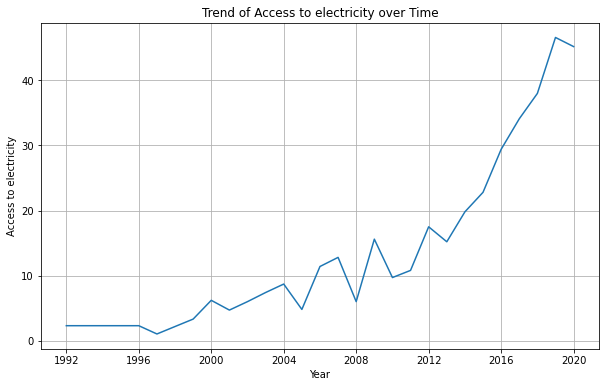


Exploring Renewable energy consumption Data:
        Year  Renewable energy consumption
0 1990-01-01                          80.1
1 1991-01-01                          81.8
2 1992-01-01                          81.6
3 1993-01-01                          81.3
4 1994-01-01                          78.5
       Renewable energy consumption
count                     31.000000
mean                      86.729032
std                        3.745948
min                       78.500000
25%                       83.650000
50%                       87.600000
75%                       90.000000
max                       91.100000


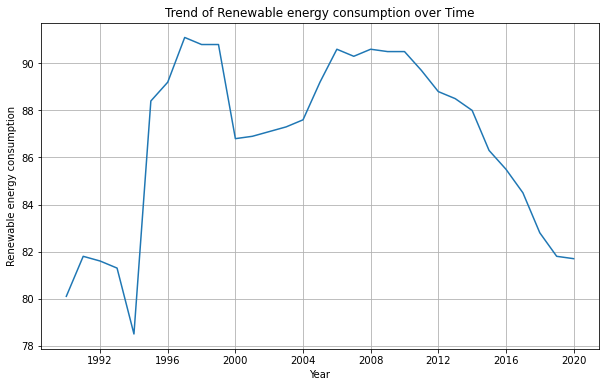


Exploring CO2 emissions Data:
        Year  CO2 emissions
0 1990-01-01       0.073274
1 1991-01-01       0.064316
2 1992-01-01       0.063150
3 1993-01-01       0.061488
4 1994-01-01       0.068580
       CO2 emissions
count      31.000000
mean        0.078572
std         0.015061
min         0.060650
25%         0.067527
50%         0.075336
75%         0.081704
max         0.113058


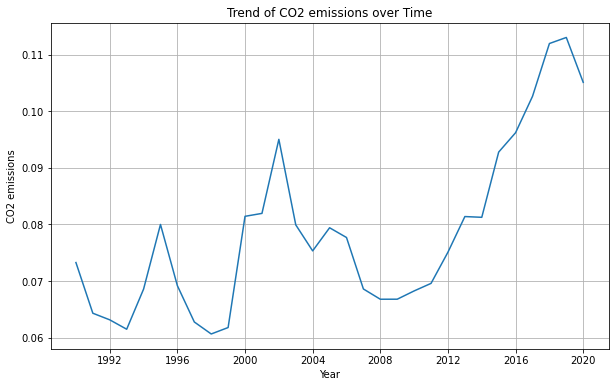


Exploring Renewable electricity output Data:
        Year  Renewable electricity output
0 1990-01-01                     97.660819
1 1991-01-01                     97.633136
2 1992-01-01                     97.727273
3 1993-01-01                     97.484277
4 1994-01-01                     97.530864
       Renewable electricity output
count                     31.000000
mean                      69.526245
std                       27.166478
min                       22.495606
25%                       45.159528
50%                       56.887828
75%                       97.507570
max                       98.327759


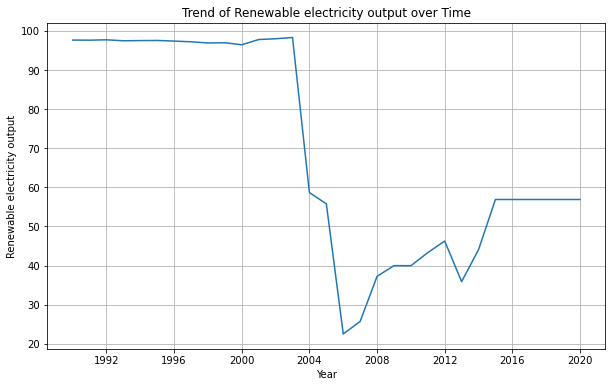


Exploring Energy intensity level of primary energy Data:
        Year  Energy intensity level of primary energy
0 1990-01-01                                       NaN
1 1991-01-01                                       NaN
2 1992-01-01                                       NaN
3 1993-01-01                                       NaN
4 1994-01-01                                       NaN
       Energy intensity level of primary energy
count                                 21.000000
mean                                   5.501905
std                                    1.137755
min                                    3.720000
25%                                    4.570000
50%                                    5.560000
75%                                    6.310000
max                                    7.800000


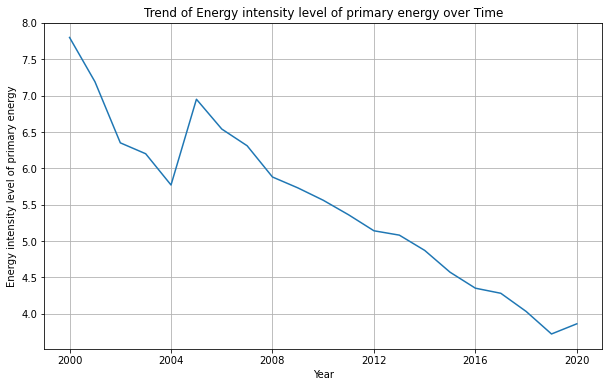

In [6]:
# Function to perform EDA on all datasets
def explore_data(datasets):
    for indicator, df in datasets.items():
        print(f"\nExploring {indicator} Data:")
        
        # Print the first few rows of the dataset for reference
        print(df.head())
        
        # Descriptive statistics
        print(df.describe())
        
        # Line plot of the indicator over time
        plt.figure(figsize=(10, 6))
        
        # Use the second column dynamically
        y_column = df.columns[1]  
        sns.lineplot(x='Year', y=y_column, data=df)
        plt.title(f'Trend of {y_column} over Time')
        plt.xlabel('Year')
        plt.ylabel(y_column)
        plt.grid(True)
        plt.show()

# Performing EDA on all datasets
explore_data(datasets)


In [7]:
# Function to display summary statistics for all datasets
def summary_statistics(datasets):
    for indicator, df in datasets.items():
        print(f"Summary Statistics for {indicator}:")
        print(df.describe())
        print("\n")

summary_statistics(datasets)

Summary Statistics for Access to electricity:
       Access to electricity
count              29.000000
mean               13.473019
std                13.293301
min                 1.027836
25%                 3.315577
50%                 8.700000
75%                17.500000
max                46.600000


Summary Statistics for Renewable energy consumption:
       Renewable energy consumption
count                     31.000000
mean                      86.729032
std                        3.745948
min                       78.500000
25%                       83.650000
50%                       87.600000
75%                       90.000000
max                       91.100000


Summary Statistics for CO2 emissions:
       CO2 emissions
count      31.000000
mean        0.078572
std         0.015061
min         0.060650
25%         0.067527
50%         0.075336
75%         0.081704
max         0.113058


Summary Statistics for Renewable electricity output:
       Renewable electricity o

In [8]:
# Calculating year-over-year growth rates for each indicator
for indicator, df in datasets.items():
    df['Growth Rate'] = df[indicator].pct_change()
    avg_growth_rate = df['Growth Rate'].mean()
    print(f"Average annual growth rate for {indicator}: {avg_growth_rate:.2%}")

Average annual growth rate for Access to electricity: 21.28%
Average annual growth rate for Renewable energy consumption: 0.10%
Average annual growth rate for CO2 emissions: 1.69%
Average annual growth rate for Renewable electricity output: 0.23%
Average annual growth rate for Energy intensity level of primary energy: -3.27%


### Correlation Analysis

C:\Users\quizd\AppData\Local\Temp\ipykernel_28532\736219872.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Growth Rate_x'} in the result is deprecated and will raise a MergeError in a future version.
  combined_df = combined_df.merge(df, on='Year', how='outer')


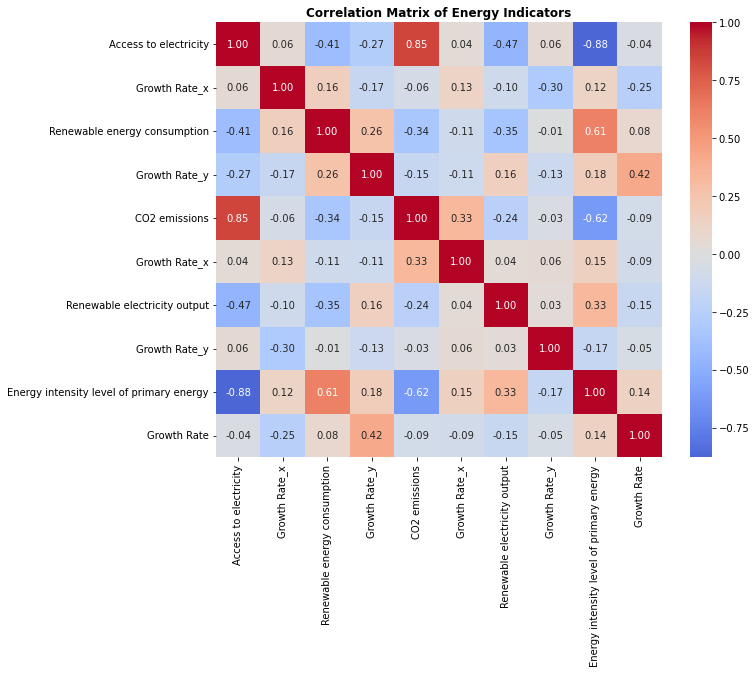

In [9]:
# Function for correlation analysis
def correlation_analysis(datasets):
    combined_df = pd.DataFrame()
    
    # Merge all datasets on 'Year'
    for indicator, df in datasets.items():
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.merge(df, on='Year', how='outer')
    
    # Calculate correlation
    correlation_matrix = combined_df.corr()
    
    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Energy Indicators',fontweight='bold')
    plt.show()

# Performing correlation analysis
correlation_analysis(datasets)


## Forecasts

C:\Users\quizd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\quizd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


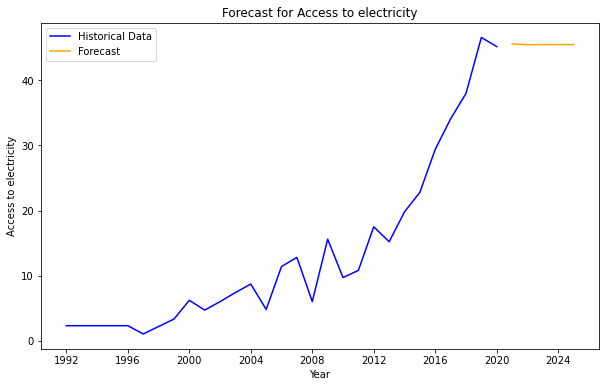

C:\Users\quizd\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


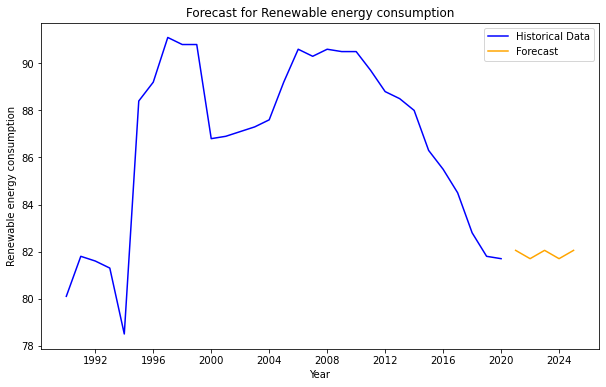

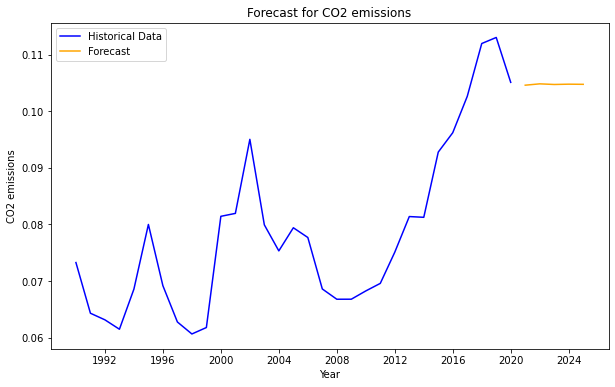

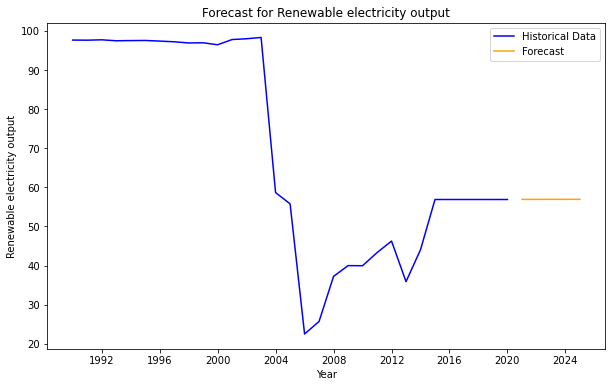

In [10]:
def forecast_multiple_indicators(datasets, indicators, steps=5):
    forecasts = {}
    
    for indicator in indicators:
        df = datasets[indicator]
        
        if 'Year' not in df.columns:
            print(f"Year column not found in dataset for {indicator}. Available columns: {df.columns.tolist()}")
            continue
        
        # Fit the ARIMA model
        model = ARIMA(df[indicator], order=(1, 1, 1))  # You can choose a suitable order
        model_fit = model.fit()

        # Forecast future values
        forecast = model_fit.forecast(steps=steps)
        
        # Create future years
        last_year = df['Year'].iloc[-1]
        future_years = [last_year + pd.DateOffset(years=i) for i in range(1, steps + 1)]
        
        # Store the results
        forecasts[indicator] = {
            'forecast': forecast,
            'future_years': future_years
        }
        
        # Plot historical and forecasted data
        plt.figure(figsize=(10, 6))
        plt.plot(df['Year'], df[indicator], label='Historical Data', color='blue')
        plt.plot(future_years, forecast, label='Forecast', color='orange')
        plt.title(f'Forecast for {indicator}')
        plt.xlabel('Year')
        plt.ylabel(indicator)
        plt.legend()
        plt.show()
    
    return forecasts

# Call the function with your datasets and the desired indicators
forecasted_results = forecast_multiple_indicators(datasets, ['Access to electricity', 'Renewable energy consumption', 'CO2 emissions','Renewable electricity output'])


C:\Users\quizd\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


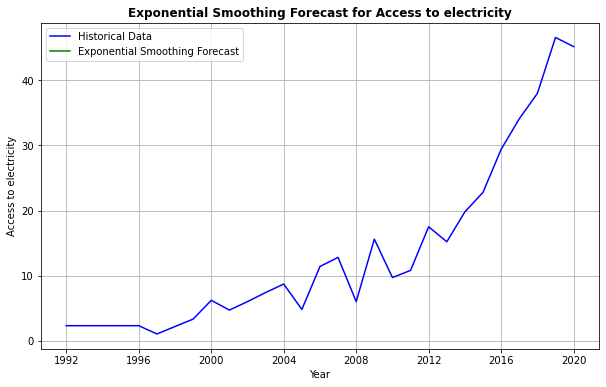

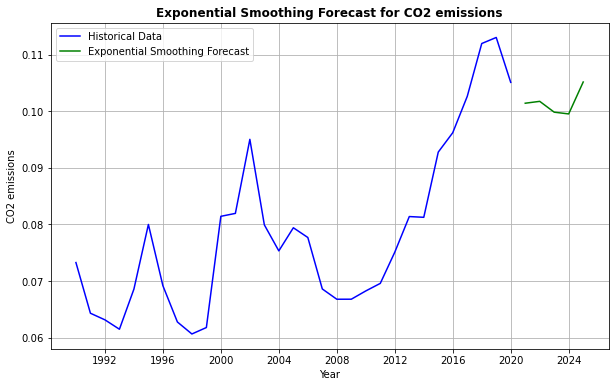

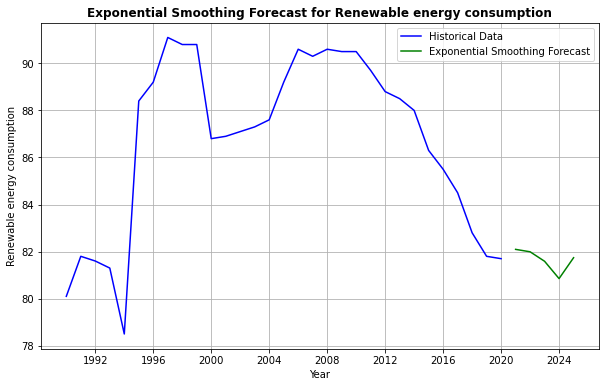

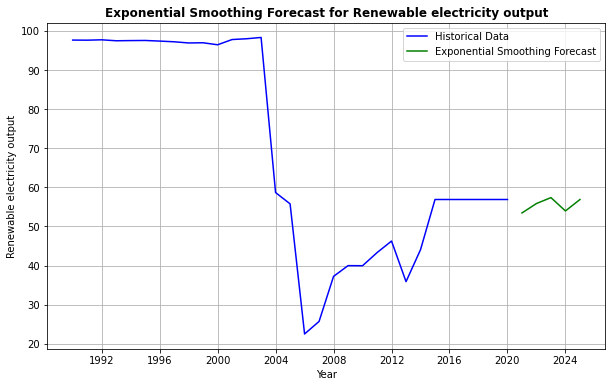

In [11]:
#Exponential smoothing forecast
def exponential_smoothing_forecast(df, indicator, steps=5):
    # Fit Exponential Smoothing model
    model = ExponentialSmoothing(df[indicator], seasonal='add', seasonal_periods=5)
    model_fit = model.fit()

    # Forecasting the next few years
    forecast = model_fit.forecast(steps)
    
    # Create new years for forecast
    last_year = df['Year'].iloc[-1]
    forecast_years = [last_year + pd.DateOffset(years=i) for i in range(1, steps + 1)]

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[indicator], label='Historical Data', color='blue')
    plt.plot(forecast_years, forecast, label='Exponential Smoothing Forecast', color='green')
    plt.title(f'Exponential Smoothing Forecast for {indicator}',fontweight = 'bold')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend()
    plt.grid()
    plt.show()

# Forecasting for "Access to electricity"
exponential_smoothing_forecast(datasets['Access to electricity'], 'Access to electricity')
exponential_smoothing_forecast(datasets['CO2 emissions'], 'CO2 emissions')
exponential_smoothing_forecast(datasets['Renewable energy consumption'], 'Renewable energy consumption')
exponential_smoothing_forecast(datasets['Renewable electricity output'], 'Renewable electricity output')


21:54:09 - cmdstanpy - INFO - Chain [1] start processing
21:54:10 - cmdstanpy - INFO - Chain [1] done processing


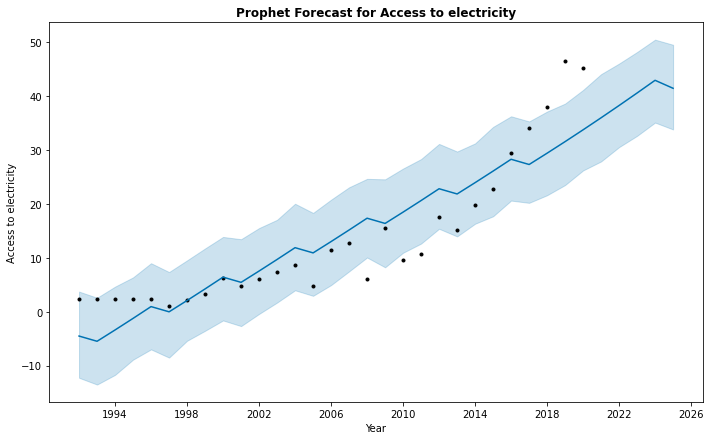

21:54:11 - cmdstanpy - INFO - Chain [1] start processing
21:54:11 - cmdstanpy - INFO - Chain [1] done processing


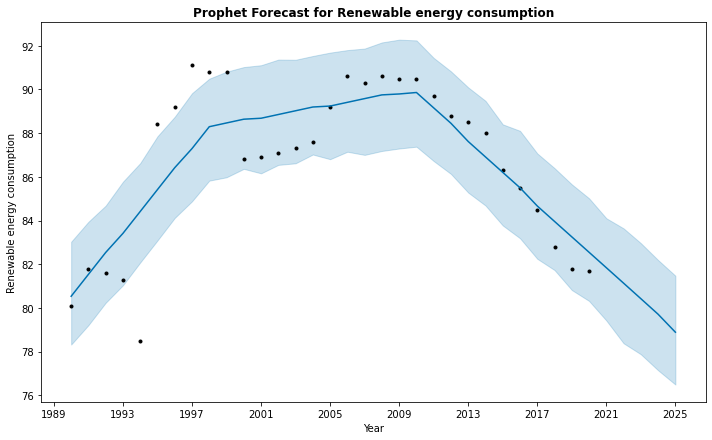

21:54:12 - cmdstanpy - INFO - Chain [1] start processing
21:54:12 - cmdstanpy - INFO - Chain [1] done processing


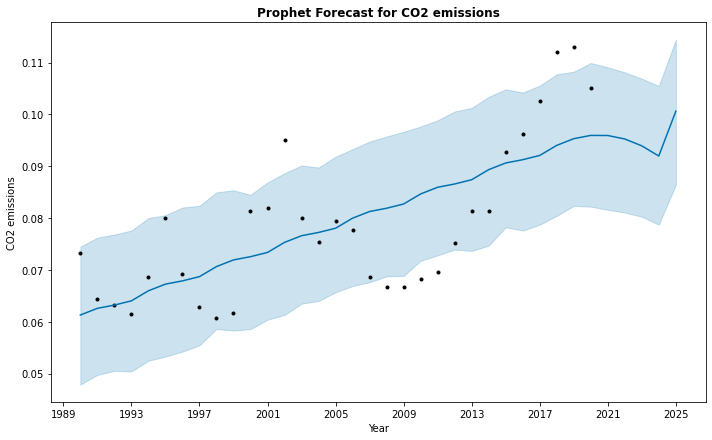

21:54:13 - cmdstanpy - INFO - Chain [1] start processing
21:54:13 - cmdstanpy - INFO - Chain [1] done processing


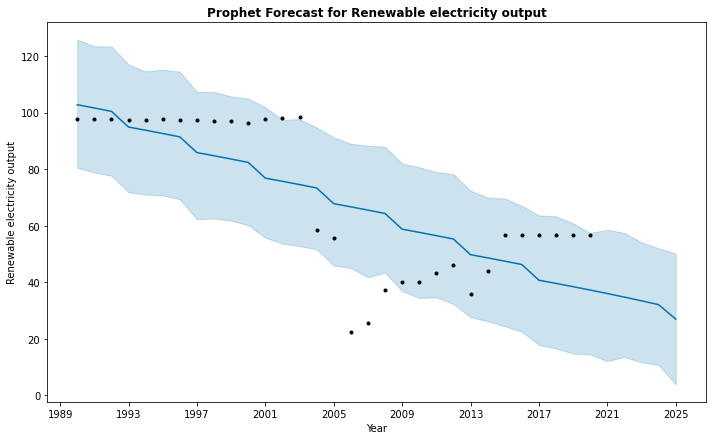

In [12]:
from prophet import Prophet

def prophet_forecast(df, indicator, steps=5):
    # Prepare data for Prophet
    prophet_df = df.rename(columns={'Year': 'ds', indicator: 'y'})

    # Fit Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Future dataframe for predictions
    future = model.make_future_dataframe(periods=steps, freq='Y')
    forecast = model.predict(future)

    # Plotting results
    model.plot(forecast)
    plt.title(f'Prophet Forecast for {indicator}',fontweight = 'bold')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.grid()
    plt.show()

# Forecasting for "Access to electricity"
prophet_forecast(datasets['Access to electricity'], 'Access to electricity')
prophet_forecast(datasets['Renewable energy consumption'], 'Renewable energy consumption')
prophet_forecast(datasets['CO2 emissions'], 'CO2 emissions')
prophet_forecast(datasets['Renewable electricity output'], 'Renewable electricity output')


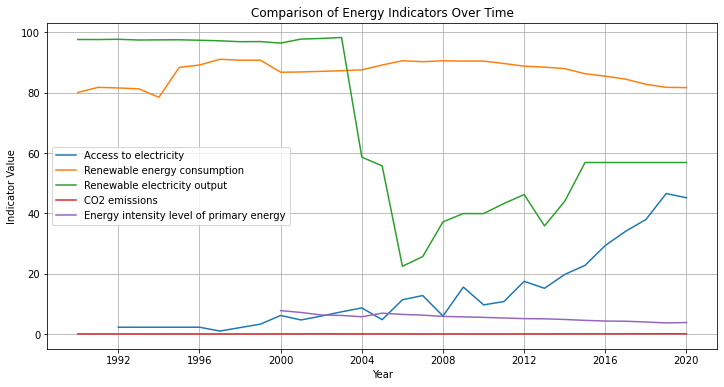

In [13]:
def multi_line_plot(datasets, indicators):
    plt.figure(figsize=(12, 6))

    for indicator in indicators:
        # Check if the indicator exists in datasets
        if indicator in datasets:
            df = datasets[indicator]
            plt.plot(df['Year'], df[indicator], label=indicator)
        else:
            print(f"Warning: '{indicator}' not found in datasets.")

    plt.title('Comparison of Energy Indicators Over Time')
    plt.xlabel('Year')
    plt.ylabel('Indicator Value')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function with exact names
multi_line_plot(datasets, ['Access to electricity', 'Renewable energy consumption','Renewable electricity output','CO2 emissions','Energy intensity level of primary energy'])


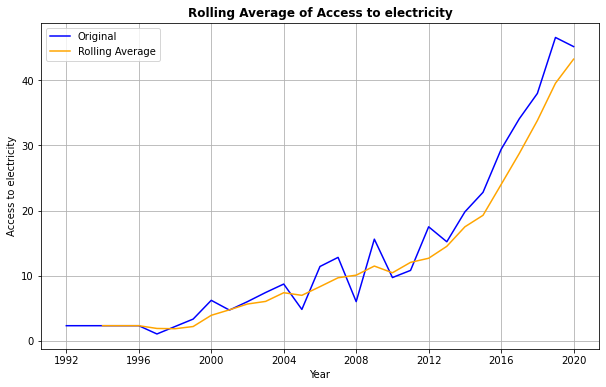

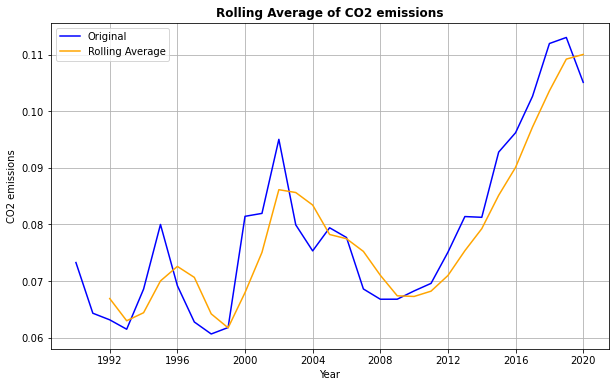

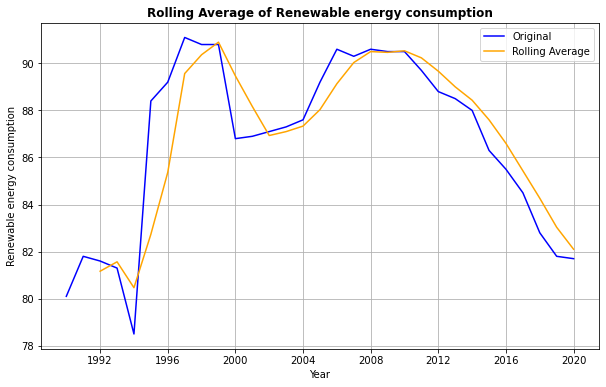

In [14]:
# Function for rolling average
def rolling_average(df, indicator, window=3):
    df['Rolling_Avg'] = df[indicator].rolling(window=window).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(df['Year'], df[indicator], label='Original', color='blue')
    plt.plot(df['Year'], df['Rolling_Avg'], label='Rolling Average', color='orange')
    plt.title(f'Rolling Average of {indicator}',fontweight = 'bold')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend()
    plt.grid()
    plt.show()

# Rolling average for "Access to electricity"
rolling_average(datasets['Access to electricity'], 'Access to electricity')
rolling_average(datasets['CO2 emissions'], 'CO2 emissions')
rolling_average(datasets['Renewable energy consumption'], 'Renewable energy consumption')


## Regression Analysis

In [15]:
import statsmodels.api as sm

def regression_analysis(datasets):
    df = datasets['CO2 emissions'].merge(datasets['Renewable energy consumption'], on='Year')
    X = df[['Renewable energy consumption']]
    y = df['CO2 emissions']
    
    model = sm.OLS(y, sm.add_constant(X)).fit()
    print(model.summary())

regression_analysis(datasets)

                            OLS Regression Results                            
Dep. Variable:          CO2 emissions   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     3.773
Date:                Fri, 27 Sep 2024   Prob (F-statistic):             0.0618
Time:                        21:54:18   Log-Likelihood:                 88.483
No. Observations:                  31   AIC:                            -173.0
Df Residuals:                      29   BIC:                            -170.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## Dashboard Creation

In [16]:
# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Rwanda's Energy Sector Dashboard", style={'text-align': 'center'}),
    
    # Dropdown to select indicators
    dcc.Dropdown(
        id='indicator-dropdown',
        options=[{'label': key, 'value': key} for key in datasets.keys()],
        value=['Access to electricity', 'CO2 emissions'],  # Default value: multi-selection
        multi=True,
        style={'width': '45%', 'display': 'inline-block'}
    ),
    
    # Radio items to choose chart type
    dcc.RadioItems(
        id='chart-type',
        options=[
            {'label': 'Line Chart', 'value': 'line'}
        ],
        value='line',
        labelStyle={'display': 'inline-block'},
        style={'width': '45%', 'display': 'inline-block'}
    ),
    
    # Container for the graphs
    html.Div([
        dcc.Graph(id='indicator-graph-1', style={'display': 'inline-block', 'width': '50%'}),
        dcc.Graph(id='indicator-graph-2', style={'display': 'inline-block', 'width': '50%'})
    ]),
    
    html.Div([
        dcc.Graph(id='indicator-graph-3', style={'display': 'inline-block', 'width': '50%'}),
        dcc.Graph(id='indicator-graph-4', style={'display': 'inline-block', 'width': '50%'})
    ]),
    
    html.Div([
        dcc.Graph(id='indicator-graph-5', style={'display': 'inline-block', 'width': '50%'})
    ]),
])

# Callback to update the graph based on selected indicators and chart type
@app.callback(
    [dash.dependencies.Output('indicator-graph-1', 'figure'),
     dash.dependencies.Output('indicator-graph-2', 'figure'),
     dash.dependencies.Output('indicator-graph-3', 'figure'),
     dash.dependencies.Output('indicator-graph-4', 'figure'),
     dash.dependencies.Output('indicator-graph-5', 'figure')],
    [dash.dependencies.Input('indicator-dropdown', 'value'),
     dash.dependencies.Input('chart-type', 'value')]
)
def update_graph(selected_indicators, chart_type):
    figures = []
    
    # Merging datasets by 'Year' for comparison (if multi-selected)
    merged_df = pd.DataFrame({'Year': datasets['Access to electricity']['Year']})
    for indicator in selected_indicators:
        merged_df = pd.merge(merged_df, datasets[indicator], on='Year', how='left')

    for i, indicator in enumerate(selected_indicators[:5]):  # Show up to 5 graphs
        fig = px.line(merged_df, x='Year', y=datasets[indicator].columns[1], 
                          title=f'{indicator} Over Time')
        figures.append(fig)

    # Fill empty figures if fewer than 5 selected
    while len(figures) < 5:
        figures.append(go.Figure())  # Placeholder empty graph
    
    return figures

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
